## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

За кожне вірно виконане завдання Ви отримуєте **1 бал**.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('titanic.csv')

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [56]:
male_all = dataset[dataset["Sex"] == "male"]
female_all = dataset[dataset["Sex"] == "female"]

male_alive = male_all[male_all["Survived"] == 1]
female_alive = female_all[female_all["Survived"] == 1]



PAM = (len(male_alive) / len(male_all)) * 100
PAF = (len(female_alive) / len(female_all)) * 100
print(f"Male alive {round(PAM)}%")
print(f"Female alive {round(PAF)}%")

Male alive 19%
Female alive 74%


**Задача 2:** Відтворіть ці графіки  
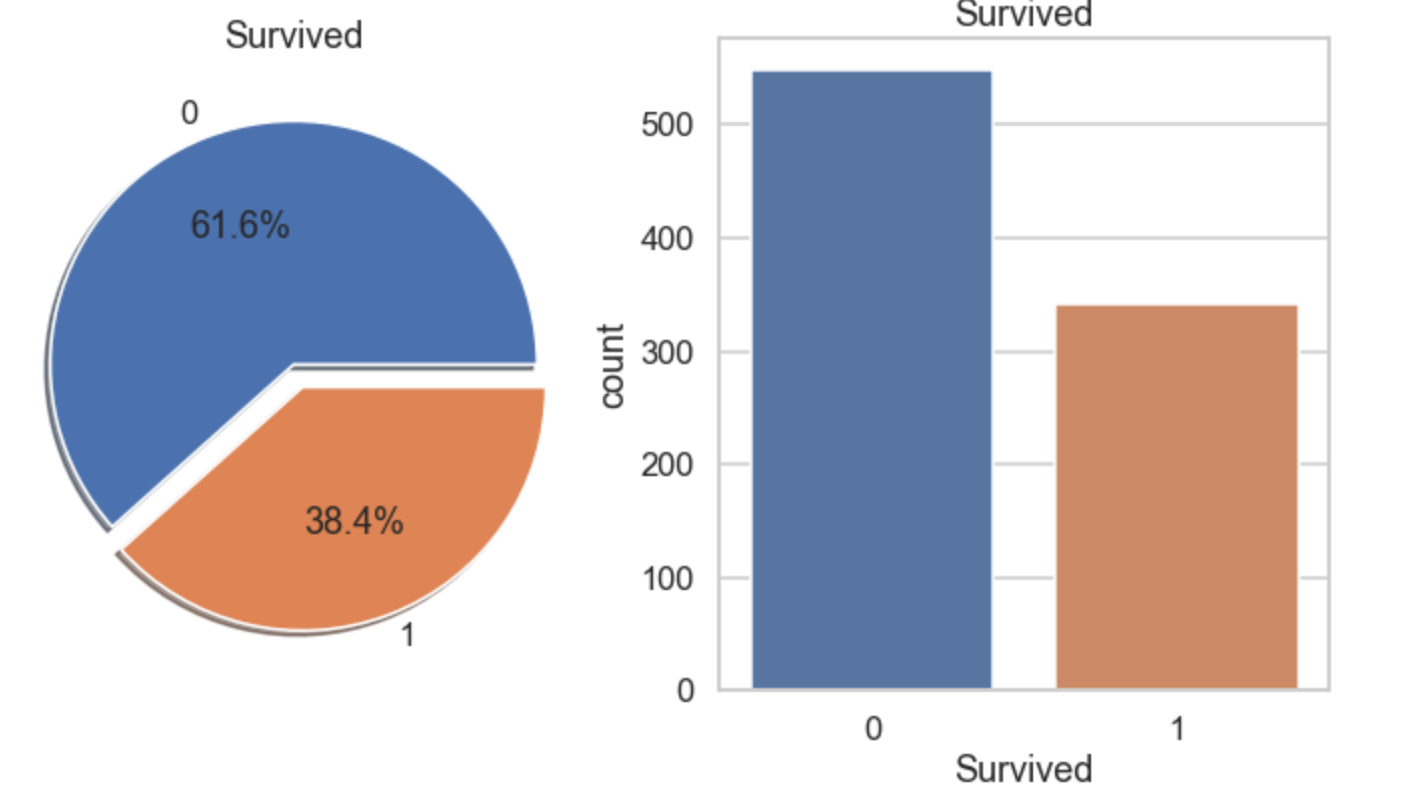


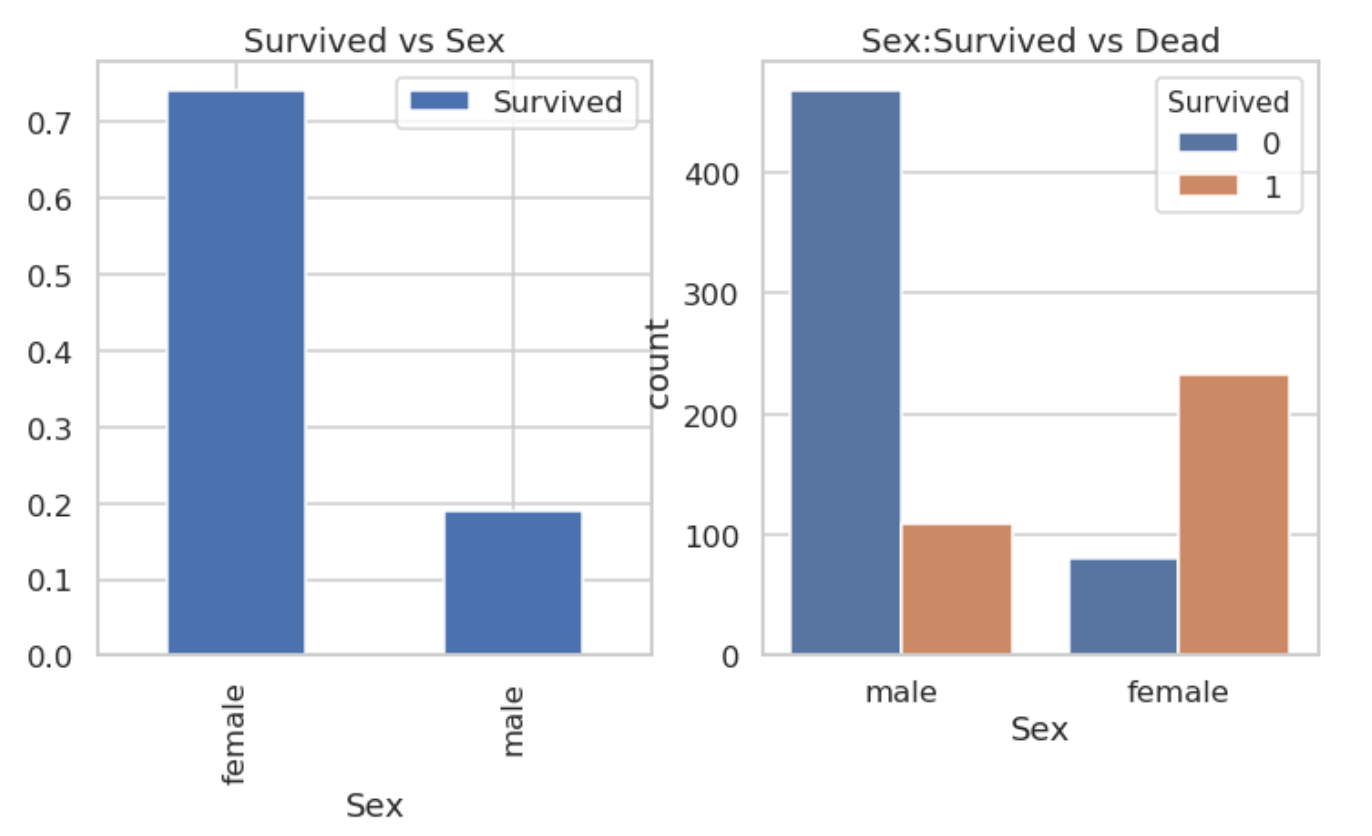

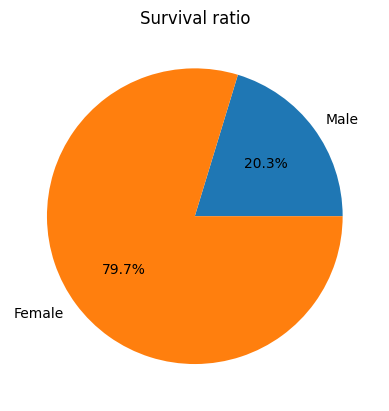

In [57]:




plt.pie([PAM, PAF], labels=['Male', 'Female'], autopct='%1.1f%%')


plt.title('Survival ratio')


plt.show()


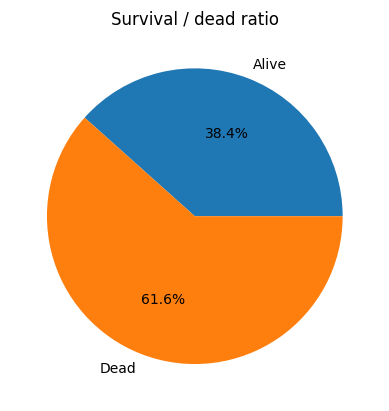

In [58]:
all_alive = len(dataset[dataset["Survived"] == 1])
all_dead = len(dataset[dataset["Survived"] == 0])

plt.pie([all_alive, all_dead], labels=['Alive', 'Dead'], autopct='%1.1f%%')


plt.title('Survival / dead ratio')


plt.show()

314


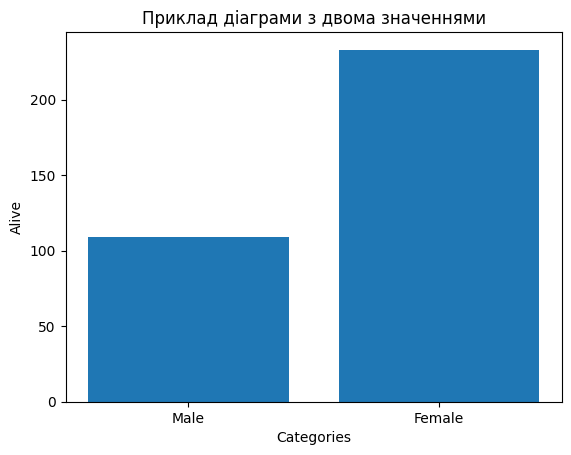

In [59]:
plt.bar(['Male', 'Female'], [len(male_alive), len(female_alive)])
print(len(female_all))
plt.xlabel('Categories')
plt.ylabel('Alive')
plt.title('Приклад діаграми з двома значеннями')

plt.show()


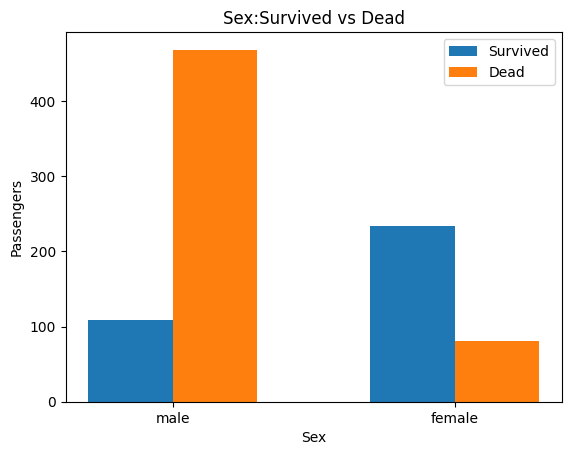

In [60]:
ma = len(dataset[(dataset["Sex"] == 'male') & (dataset["Survived"] == 1)])
md = len(dataset[(dataset["Sex"] == 'male') & (dataset["Survived"] == 0)])


fa = len(dataset[(dataset["Sex"] == 'female') & (dataset["Survived"] == 1)])
fd = len(dataset[(dataset["Sex"] == 'female') & (dataset["Survived"] == 0)])






plt.bar([1, 2], [ma, fa], width=0.3, label='Survived')
plt.bar([1.3, 2.3], [md, fd], width=0.3,  label='Dead')


plt.title('Sex:Survived vs Dead')
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.xticks([1.15, 2.15], ['male', 'female'])
plt.legend()


plt.show()


**Прокоментуйте побудовані графіки**:


1.   Співвідношення загиблих чоловіків і жінок
2.   Чоловіків загинуло більше



**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [61]:
null_age = len(dataset[dataset["Age"].isnull()])
null_survived = len(dataset[dataset["Survived"].isnull()])
null_pclass = len(dataset[dataset["Pclass"].isnull()])
null_name = len(dataset[dataset["Name"].isnull()])
null_sex = len(dataset[dataset["Sex"].isnull()])
null_sibsp = len(dataset[dataset["SibSp"].isnull()])
null_parch = len(dataset[dataset["Parch"].isnull()])
null_ticket = len(dataset[dataset["Ticket"].isnull()])
null_fare = len(dataset[dataset["Fare"].isnull()])
null_cabin = len(dataset[dataset["Cabin"].isnull()])
null_embarked = len(dataset[dataset["Embarked"].isnull()])


print(f'{null_age}, {null_survived}, {null_pclass}, {null_name}, {null_sex}, {null_sibsp}, {null_parch}, {null_ticket}, {null_fare}, {null_cabin}, {null_embarked}')

177, 0, 0, 0, 0, 0, 0, 0, 0, 687, 2


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [62]:
import re

def add_person_to_list(list, name):
    if name in list:
        list[name] += 1
    else:
        list[name] = 1

def prepare_name(full_part_name):
    full_part_name = person.split('. ')
    name = full_part_name[1].split(" ")
    name = re.sub("[^a-zA-Z ]", "", name[0]).strip()
    return name

women_list = {}

for person in dataset.loc[dataset["Sex"] == "female", "Name"]:
    add_person_to_list(women_list, prepare_name(person))



print(max(women_list, key=women_list.get))

William


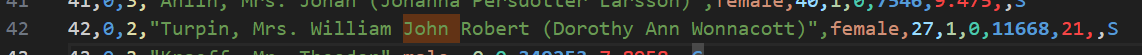



**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [63]:
men_list = {}

for person in dataset.loc[dataset["Sex"] == "male", "Name"]:
    add_person_to_list(men_list, prepare_name(person))



print(max(men_list, key=men_list.get))

William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
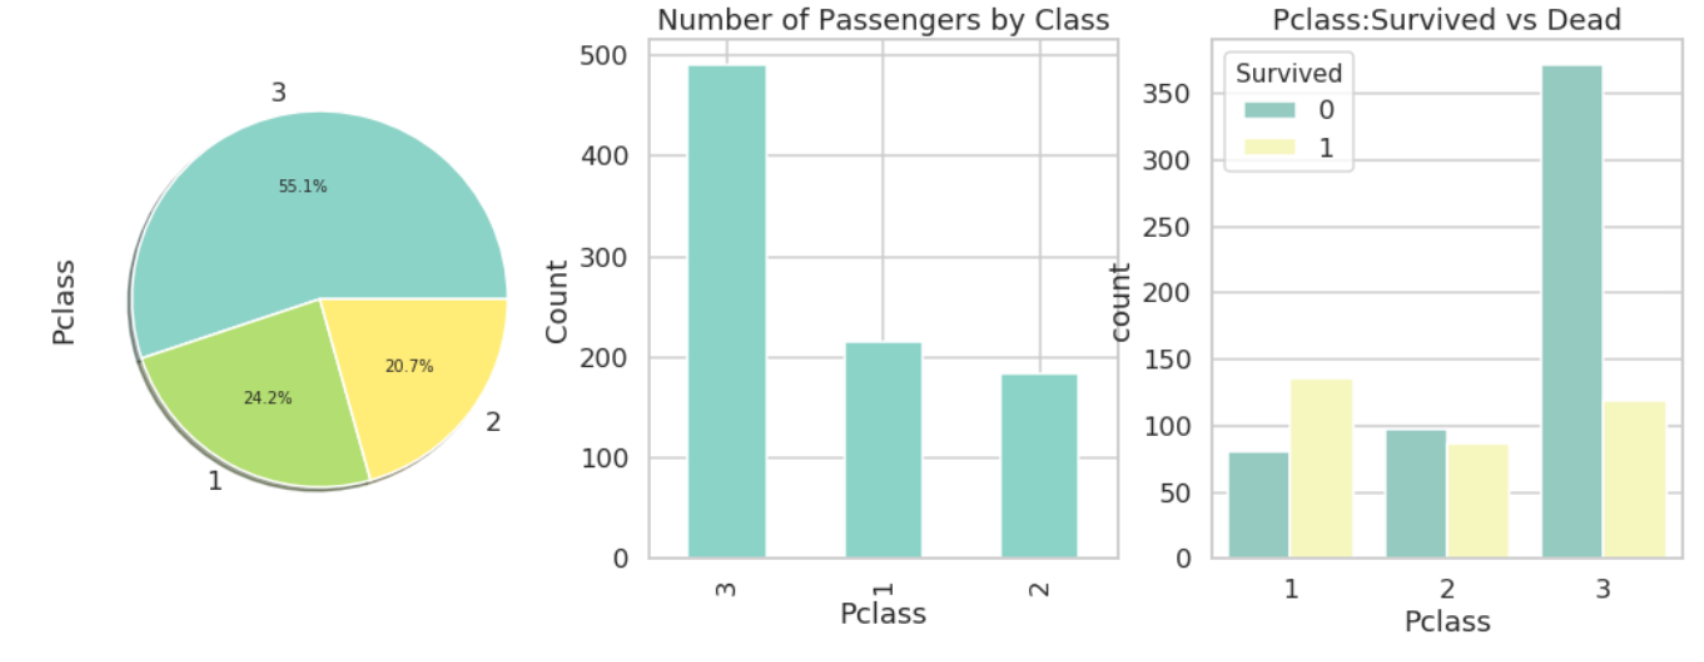

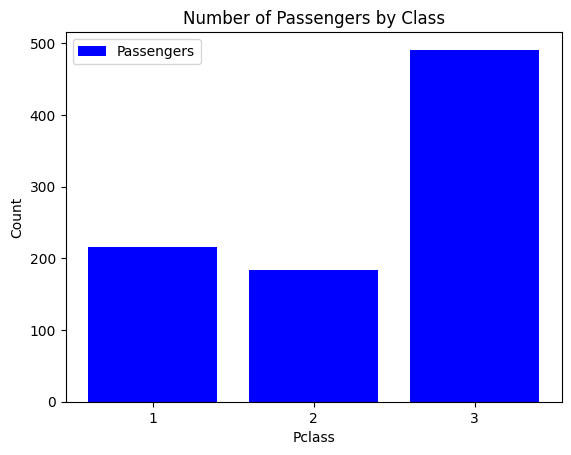

In [64]:
firstclass = len(dataset[dataset["Pclass"] == 1])
secondclass = len(dataset[dataset["Pclass"] == 2])
third = len(dataset[dataset["Pclass"] == 3])

plt.bar([1, 2, 3], [firstclass, secondclass, third], color='b', label='Passengers')


plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Number of Passengers by Class')
plt.xticks([1, 2, 3]) 
plt.legend()      


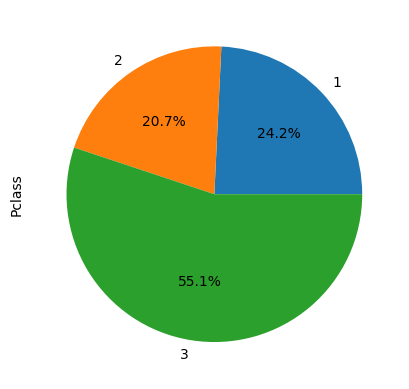

In [65]:
plt.pie([firstclass, secondclass, third], labels=['1', '2', '3'], autopct='%1.1f%%')



plt.ylabel('Pclass')
plt.show()

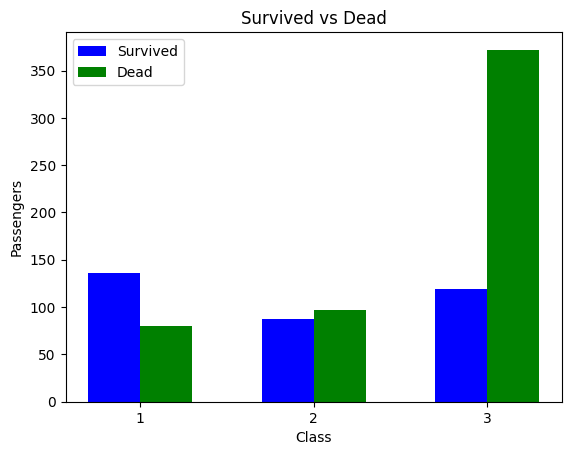

In [66]:
firstclassalive = len(dataset[(dataset["Pclass"] == 1) & (dataset["Survived"] == 1)])
secondclassalive = len(dataset[(dataset["Pclass"] == 2) & (dataset["Survived"] == 1)])
thirdalive = len(dataset[(dataset["Pclass"] == 3) & (dataset["Survived"] == 1)])

firstclassdead = len(dataset[(dataset["Pclass"] == 1) & (dataset["Survived"] == 0)])
secondclassdead = len(dataset[(dataset["Pclass"] == 2) & (dataset["Survived"] == 0)])
thirddead = len(dataset[(dataset["Pclass"] == 3) & (dataset["Survived"] == 0)])





plt.bar([1, 2, 3], [firstclassalive, secondclassalive, thirdalive], width=0.3, color='b', label='Survived')
plt.bar([1.3, 2.3, 3.3], [firstclassdead, secondclassdead, thirddead], width=0.3, color='g', label='Dead')


plt.title('Survived vs Dead')
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.xticks([1.15, 2.15, 3.15], ['1', '2', '3'])
plt.legend()


plt.show()


**Коментар**:

6.1. Кількість пасажирів за класом
6.2  Відсоток пасажирів за класом
6.3  Співвіднощення виживших/загиблих за класом

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
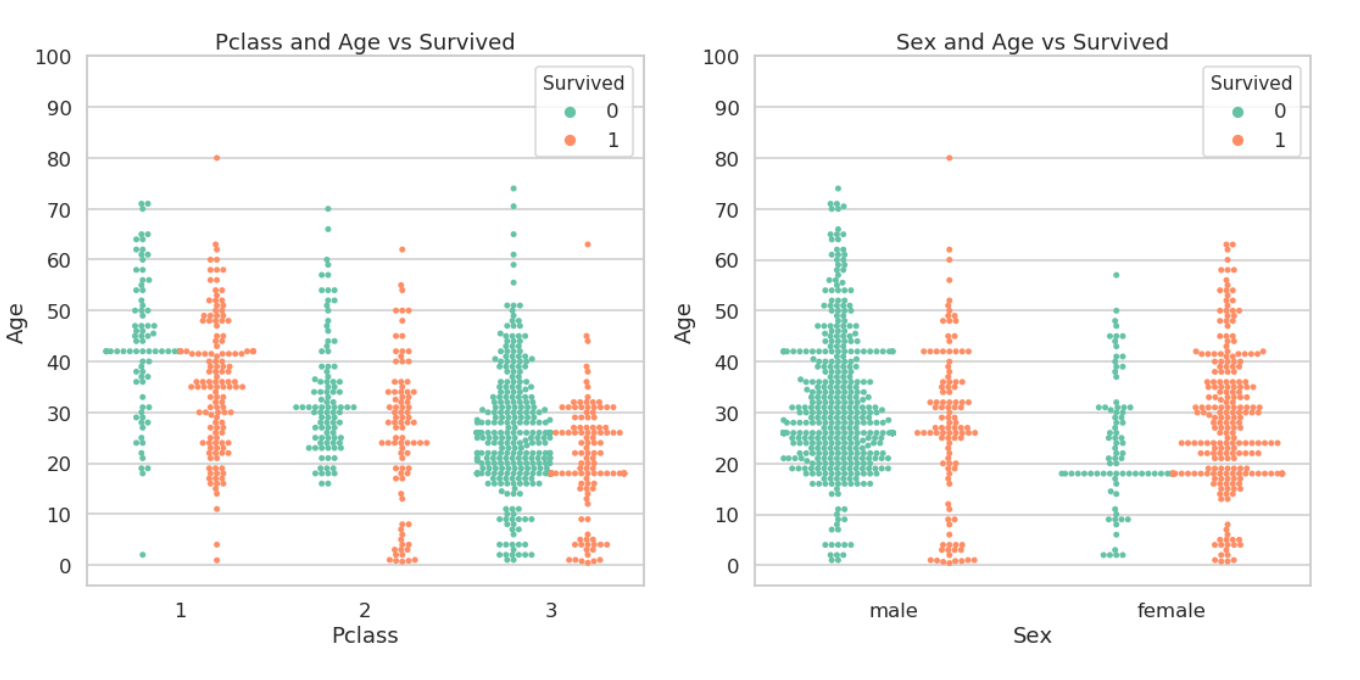![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

[{'age': 38.0, 'count': 1}, {'age': 38.0, 'count': 2}, {'age': 38.0, 'count': 3}, {'age': 38.0, 'count': 4}, {'age': 35.0, 'count': 1}, {'age': 35.0, 'count': 2}, {'age': 35.0, 'count': 3}, {'age': 35.0, 'count': 4}, {'age': 35.0, 'count': 5}, {'age': 35.0, 'count': 6}, {'age': 35.0, 'count': 7}, {'age': 35.0, 'count': 8}, {'age': 35.0, 'count': 9}, {'age': 58.0, 'count': 1}, {'age': 58.0, 'count': 2}, {'age': 58.0, 'count': 3}, {'age': 28.0, 'count': 1}, {'age': 28.0, 'count': 2}, {'age': 49.0, 'count': 1}, {'age': 49.0, 'count': 2}, {'age': 49.0, 'count': 3}, {'age': 49.0, 'count': 4}, {'age': 23.0, 'count': 1}, {'age': 23.0, 'count': 2}, {'age': 23.0, 'count': 3}, {'age': 19.0, 'count': 1}, {'age': 19.0, 'count': 2}, {'age': 19.0, 'count': 3}, {'age': 22.0, 'count': 1}, {'age': 22.0, 'count': 2}, {'age': 22.0, 'count': 3}, {'age': 22.0, 'count': 4}, {'age': 45.0, 'count': 1}, {'age': 45.0, 'count': 2}, {'age': 44.0, 'count': 1}, {'age': 44.0, 'count': 2}, {'age': 40.0, 'count': 1}, 

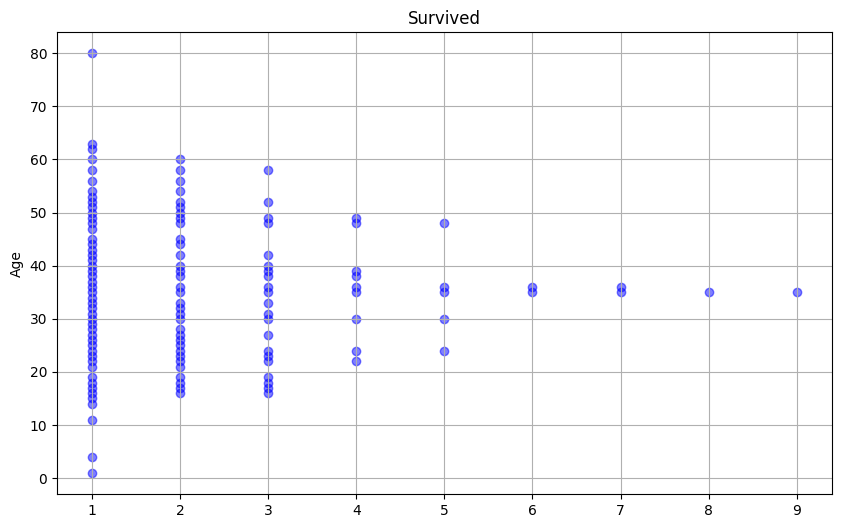

In [67]:
def get_count_by_age(age_count_list, target_age):
    for item in age_count_list:
        if item['age'] == target_age:
            return item['count']
    return None

def paints(group, b):
    alive = "Survived" if b >= 1 else "Not Survived"

    age_count_list = []

    plt.figure(figsize=(10, 6))


    unique_ages = group["Age"].dropna().unique()
    for age in unique_ages:
        count = 0
        for index, row in group.iterrows():
            if row["Age"] == age:
                count += 1
                age_count_list.append({"age": age, "count": count})
                plt.scatter(count, age, color='blue', alpha=0.5)

    print(age_count_list)


    plt.ylabel("Age")
    plt.title(alive)
    plt.grid(True)
    plt.show()



group1 = dataset[(dataset["Pclass"] == 1) & (dataset["Survived"] == 1)]
paints(group1, 1)


[{'age': 54.0, 'count': 1}, {'age': 54.0, 'count': 2}, {'age': 19.0, 'count': 1}, {'age': 19.0, 'count': 2}, {'age': 40.0, 'count': 1}, {'age': 40.0, 'count': 2}, {'age': 28.0, 'count': 1}, {'age': 28.0, 'count': 2}, {'age': 42.0, 'count': 1}, {'age': 65.0, 'count': 1}, {'age': 65.0, 'count': 2}, {'age': 45.0, 'count': 1}, {'age': 45.0, 'count': 2}, {'age': 45.0, 'count': 3}, {'age': 46.0, 'count': 1}, {'age': 46.0, 'count': 2}, {'age': 71.0, 'count': 1}, {'age': 71.0, 'count': 2}, {'age': 21.0, 'count': 1}, {'age': 47.0, 'count': 1}, {'age': 47.0, 'count': 2}, {'age': 47.0, 'count': 3}, {'age': 47.0, 'count': 4}, {'age': 24.0, 'count': 1}, {'age': 24.0, 'count': 2}, {'age': 37.0, 'count': 1}, {'age': 37.0, 'count': 2}, {'age': 51.0, 'count': 1}, {'age': 61.0, 'count': 1}, {'age': 61.0, 'count': 2}, {'age': 56.0, 'count': 1}, {'age': 56.0, 'count': 2}, {'age': 50.0, 'count': 1}, {'age': 50.0, 'count': 2}, {'age': 50.0, 'count': 3}, {'age': 44.0, 'count': 1}, {'age': 62.0, 'count': 1}, 

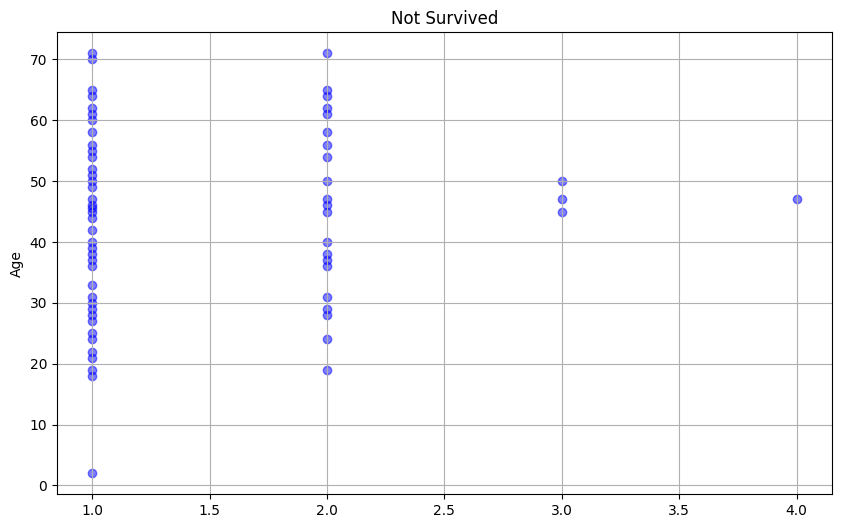

In [68]:
group2 = dataset[(dataset["Pclass"] == 1) & (dataset["Survived"] == 0)]
paints(group2, 0)

[{'age': 14.0, 'count': 1}, {'age': 55.0, 'count': 1}, {'age': 34.0, 'count': 1}, {'age': 34.0, 'count': 2}, {'age': 34.0, 'count': 3}, {'age': 34.0, 'count': 4}, {'age': 34.0, 'count': 5}, {'age': 3.0, 'count': 1}, {'age': 3.0, 'count': 2}, {'age': 3.0, 'count': 3}, {'age': 29.0, 'count': 1}, {'age': 29.0, 'count': 2}, {'age': 29.0, 'count': 3}, {'age': 21.0, 'count': 1}, {'age': 5.0, 'count': 1}, {'age': 0.83, 'count': 1}, {'age': 0.83, 'count': 2}, {'age': 17.0, 'count': 1}, {'age': 17.0, 'count': 2}, {'age': 32.5, 'count': 1}, {'age': 40.0, 'count': 1}, {'age': 40.0, 'count': 2}, {'age': 40.0, 'count': 3}, {'age': 1.0, 'count': 1}, {'age': 1.0, 'count': 2}, {'age': 32.0, 'count': 1}, {'age': 32.0, 'count': 2}, {'age': 35.0, 'count': 1}, {'age': 19.0, 'count': 1}, {'age': 19.0, 'count': 2}, {'age': 19.0, 'count': 3}, {'age': 8.0, 'count': 1}, {'age': 8.0, 'count': 2}, {'age': 24.0, 'count': 1}, {'age': 24.0, 'count': 2}, {'age': 24.0, 'count': 3}, {'age': 24.0, 'count': 4}, {'age': 

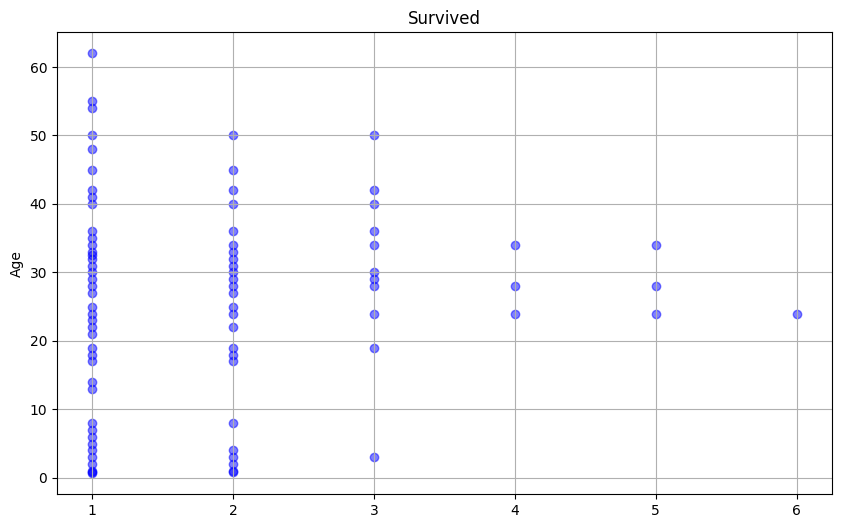

In [69]:
group3 = dataset[(dataset["Pclass"] == 2) & (dataset["Survived"] == 1)]
paints(group3, 1)


[{'age': 35.0, 'count': 1}, {'age': 35.0, 'count': 2}, {'age': 66.0, 'count': 1}, {'age': 27.0, 'count': 1}, {'age': 27.0, 'count': 2}, {'age': 27.0, 'count': 3}, {'age': 27.0, 'count': 4}, {'age': 32.0, 'count': 1}, {'age': 32.0, 'count': 2}, {'age': 21.0, 'count': 1}, {'age': 21.0, 'count': 2}, {'age': 21.0, 'count': 3}, {'age': 34.0, 'count': 1}, {'age': 34.0, 'count': 2}, {'age': 34.0, 'count': 3}, {'age': 34.0, 'count': 4}, {'age': 34.0, 'count': 5}, {'age': 29.0, 'count': 1}, {'age': 29.0, 'count': 2}, {'age': 29.0, 'count': 3}, {'age': 32.5, 'count': 1}, {'age': 25.0, 'count': 1}, {'age': 25.0, 'count': 2}, {'age': 25.0, 'count': 3}, {'age': 25.0, 'count': 4}, {'age': 25.0, 'count': 5}, {'age': 23.0, 'count': 1}, {'age': 23.0, 'count': 2}, {'age': 23.0, 'count': 3}, {'age': 23.0, 'count': 4}, {'age': 23.0, 'count': 5}, {'age': 23.0, 'count': 6}, {'age': 18.0, 'count': 1}, {'age': 18.0, 'count': 2}, {'age': 18.0, 'count': 3}, {'age': 18.0, 'count': 4}, {'age': 19.0, 'count': 1}, 

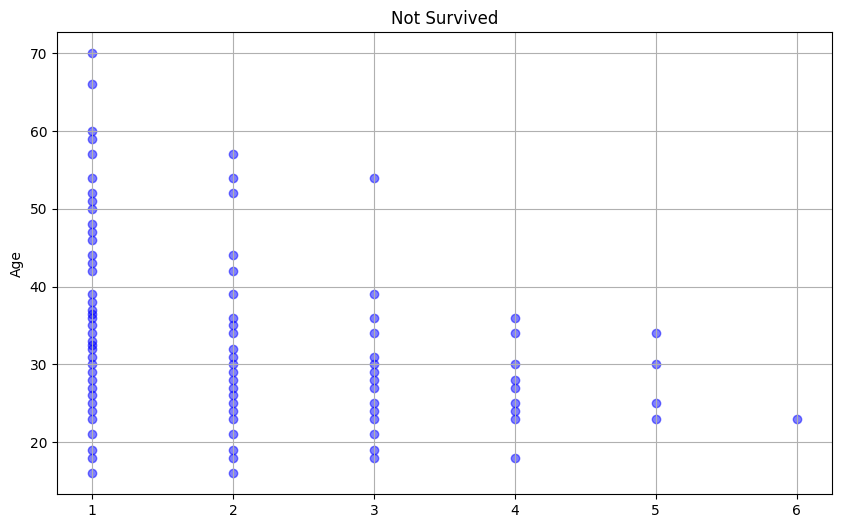

In [70]:

paints(dataset[(dataset["Pclass"] == 2) & (dataset["Survived"] == 0)], 0)

[{'age': 26.0, 'count': 1}, {'age': 26.0, 'count': 2}, {'age': 26.0, 'count': 3}, {'age': 26.0, 'count': 4}, {'age': 27.0, 'count': 1}, {'age': 27.0, 'count': 2}, {'age': 27.0, 'count': 3}, {'age': 27.0, 'count': 4}, {'age': 27.0, 'count': 5}, {'age': 27.0, 'count': 6}, {'age': 4.0, 'count': 1}, {'age': 4.0, 'count': 2}, {'age': 4.0, 'count': 3}, {'age': 4.0, 'count': 4}, {'age': 15.0, 'count': 1}, {'age': 15.0, 'count': 2}, {'age': 15.0, 'count': 3}, {'age': 38.0, 'count': 1}, {'age': 14.0, 'count': 1}, {'age': 19.0, 'count': 1}, {'age': 19.0, 'count': 2}, {'age': 19.0, 'count': 3}, {'age': 17.0, 'count': 1}, {'age': 32.0, 'count': 1}, {'age': 32.0, 'count': 2}, {'age': 32.0, 'count': 3}, {'age': 32.0, 'count': 4}, {'age': 32.0, 'count': 5}, {'age': 30.0, 'count': 1}, {'age': 30.0, 'count': 2}, {'age': 29.0, 'count': 1}, {'age': 29.0, 'count': 2}, {'age': 29.0, 'count': 3}, {'age': 29.0, 'count': 4}, {'age': 33.0, 'count': 1}, {'age': 21.0, 'count': 1}, {'age': 21.0, 'count': 2}, {'ag

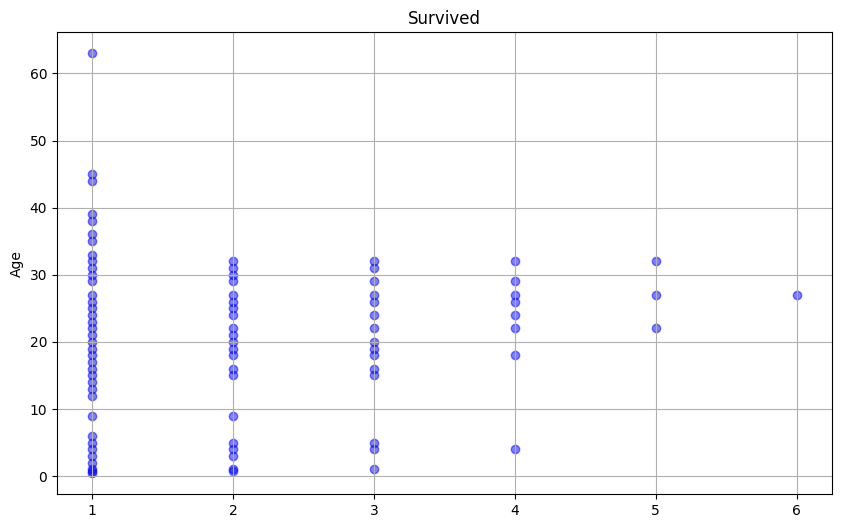

In [71]:
paints(dataset[(dataset["Pclass"] == 3) & (dataset["Survived"] == 1)], 1)

[{'age': 22.0, 'count': 1}, {'age': 22.0, 'count': 2}, {'age': 22.0, 'count': 3}, {'age': 22.0, 'count': 4}, {'age': 22.0, 'count': 5}, {'age': 22.0, 'count': 6}, {'age': 22.0, 'count': 7}, {'age': 22.0, 'count': 8}, {'age': 22.0, 'count': 9}, {'age': 22.0, 'count': 10}, {'age': 22.0, 'count': 11}, {'age': 22.0, 'count': 12}, {'age': 22.0, 'count': 13}, {'age': 22.0, 'count': 14}, {'age': 22.0, 'count': 15}, {'age': 35.0, 'count': 1}, {'age': 35.0, 'count': 2}, {'age': 35.0, 'count': 3}, {'age': 35.0, 'count': 4}, {'age': 35.0, 'count': 5}, {'age': 2.0, 'count': 1}, {'age': 2.0, 'count': 2}, {'age': 2.0, 'count': 3}, {'age': 2.0, 'count': 4}, {'age': 2.0, 'count': 5}, {'age': 2.0, 'count': 6}, {'age': 20.0, 'count': 1}, {'age': 20.0, 'count': 2}, {'age': 20.0, 'count': 3}, {'age': 20.0, 'count': 4}, {'age': 20.0, 'count': 5}, {'age': 20.0, 'count': 6}, {'age': 20.0, 'count': 7}, {'age': 20.0, 'count': 8}, {'age': 20.0, 'count': 9}, {'age': 20.0, 'count': 10}, {'age': 20.0, 'count': 11}

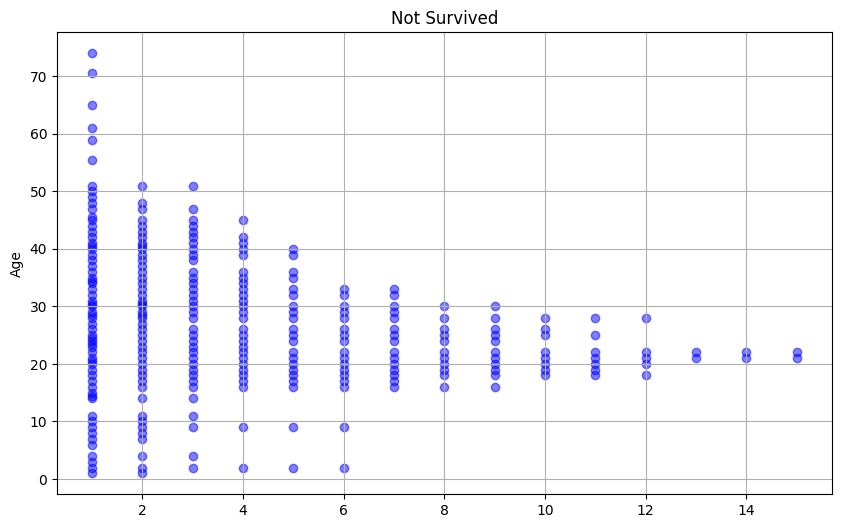

In [72]:
paints(dataset[(dataset["Pclass"] == 3) & (dataset["Survived"] == 0)], 0)

**Прокоментуйте побудовані графіки**:


1.   Демографічне дерево пасажирів за класами.
2.   Найбільше 3 класом користувались молоді а 1 старші люди.

**Задача 8** Побудуйте наступні діаграми розподілів:  

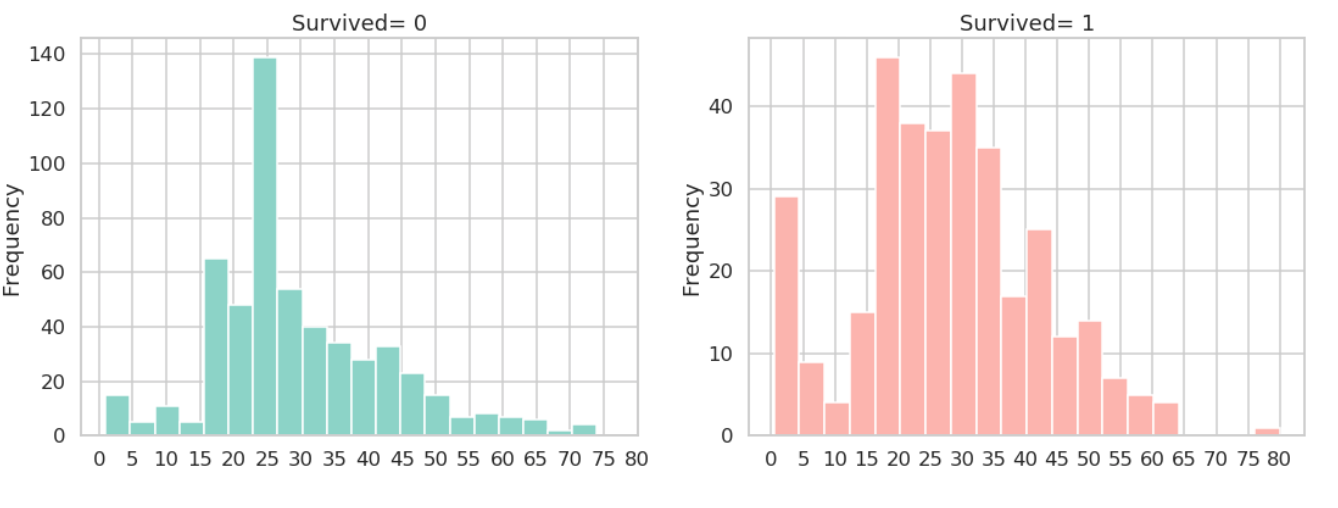



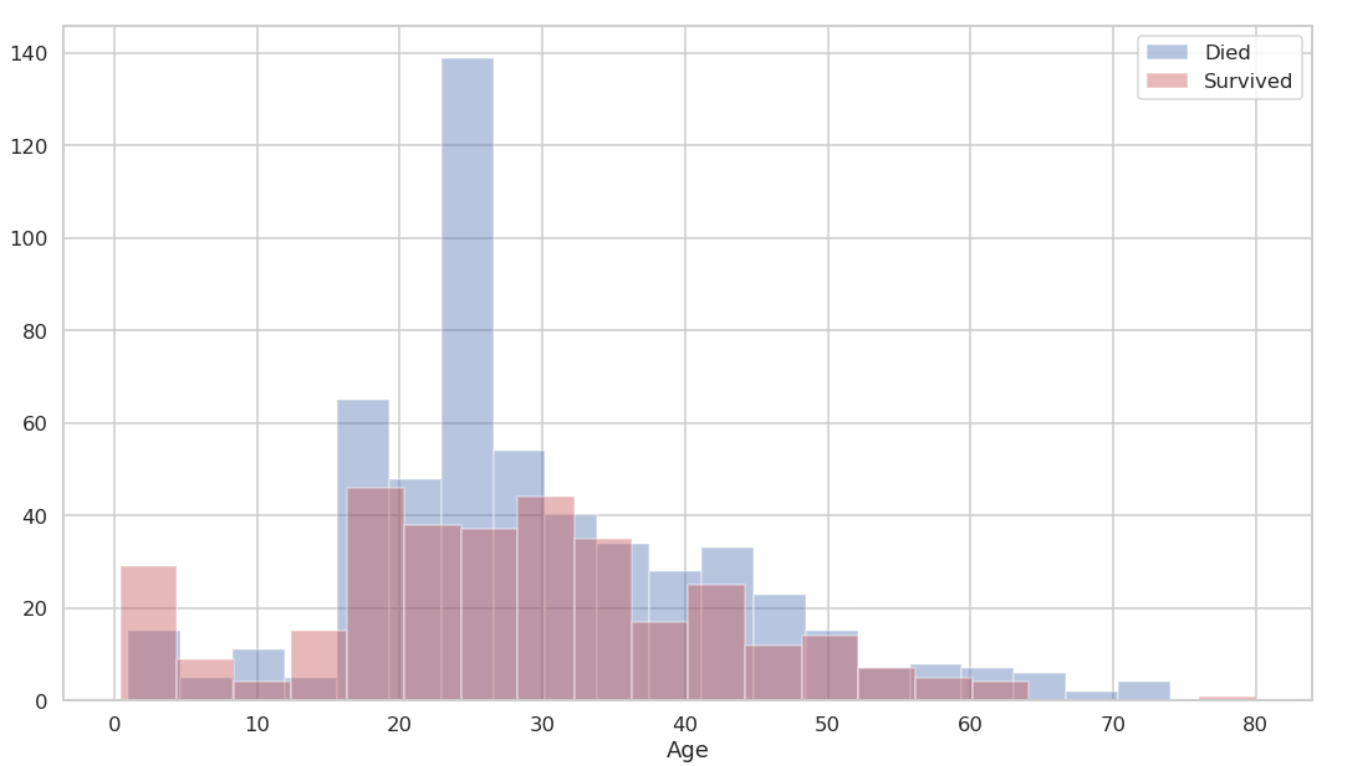

C:\Users\mn508\AppData\Local\Temp\ipykernel_19524\2360281876.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = survived_ds.groupby(pd.cut(survived_ds['Age'], bins=range(0, 90, 5)))


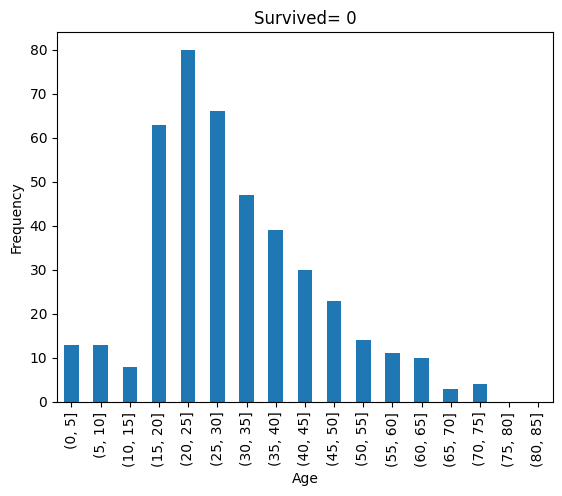

In [73]:
survived_ds = dataset[dataset['Survived'] == 0]

age_groups = survived_ds.groupby(pd.cut(survived_ds['Age'], bins=range(0, 90, 5)))
age_group_counts = age_groups.size()

age_group_counts.plot(kind='bar')

plt.ylabel('Frequency')
plt.title('Survived= 0')

plt.show()

C:\Users\mn508\AppData\Local\Temp\ipykernel_19524\3954797638.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = survived_ds.groupby(pd.cut(survived_ds['Age'], bins=range(0, 90, 5)))


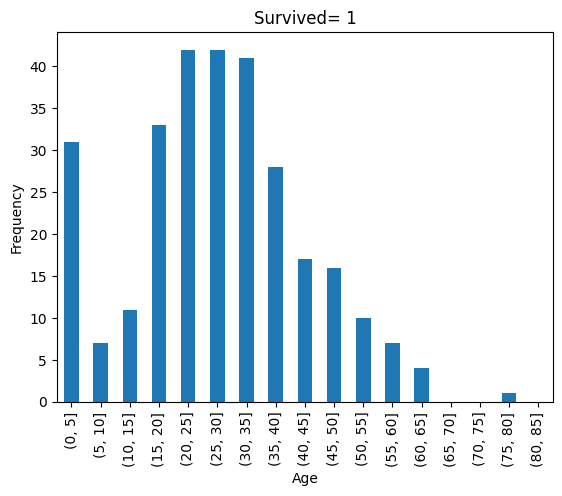

In [74]:
survived_ds = dataset[dataset['Survived'] == 1]

age_groups = survived_ds.groupby(pd.cut(survived_ds['Age'], bins=range(0, 90, 5)))
age_group_counts = age_groups.size()

age_group_counts.plot(kind='bar')

plt.ylabel('Frequency')
plt.title('Survived= 1')

plt.show()

C:\Users\mn508\AppData\Local\Temp\ipykernel_19524\2799934290.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups_survived = survived_ds.groupby(pd.cut(survived_ds['Age'], bins=range(0, 90, 10)))
C:\Users\mn508\AppData\Local\Temp\ipykernel_19524\2799934290.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups_not_survived = not_survived_ds.groupby(pd.cut(not_survived_ds['Age'], bins=range(0, 90, 10)))


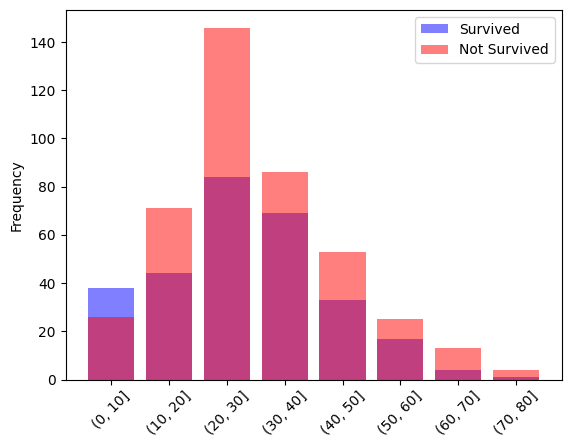

In [75]:
survived_ds = dataset[dataset['Survived'] == 1]
not_survived_ds = dataset[dataset['Survived'] == 0]


age_groups_survived = survived_ds.groupby(pd.cut(survived_ds['Age'], bins=range(0, 90, 10)))
age_group_counts_survived = age_groups_survived.size()

age_groups_not_survived = not_survived_ds.groupby(pd.cut(not_survived_ds['Age'], bins=range(0, 90, 10)))
age_group_counts_not_survived = age_groups_not_survived.size()

plt.bar(age_group_counts_survived.index.astype(str), age_group_counts_survived.values, color='blue', alpha=0.5, label='Survived')
plt.bar(age_group_counts_not_survived.index.astype(str), age_group_counts_not_survived.values, color='red', alpha=0.5, label='Not Survived')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?**



1.   Найбільше загиблих людей віком 20-25 років
2.   Недостатньо бо тут не враховується вартість квитка, клас та стать.




**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
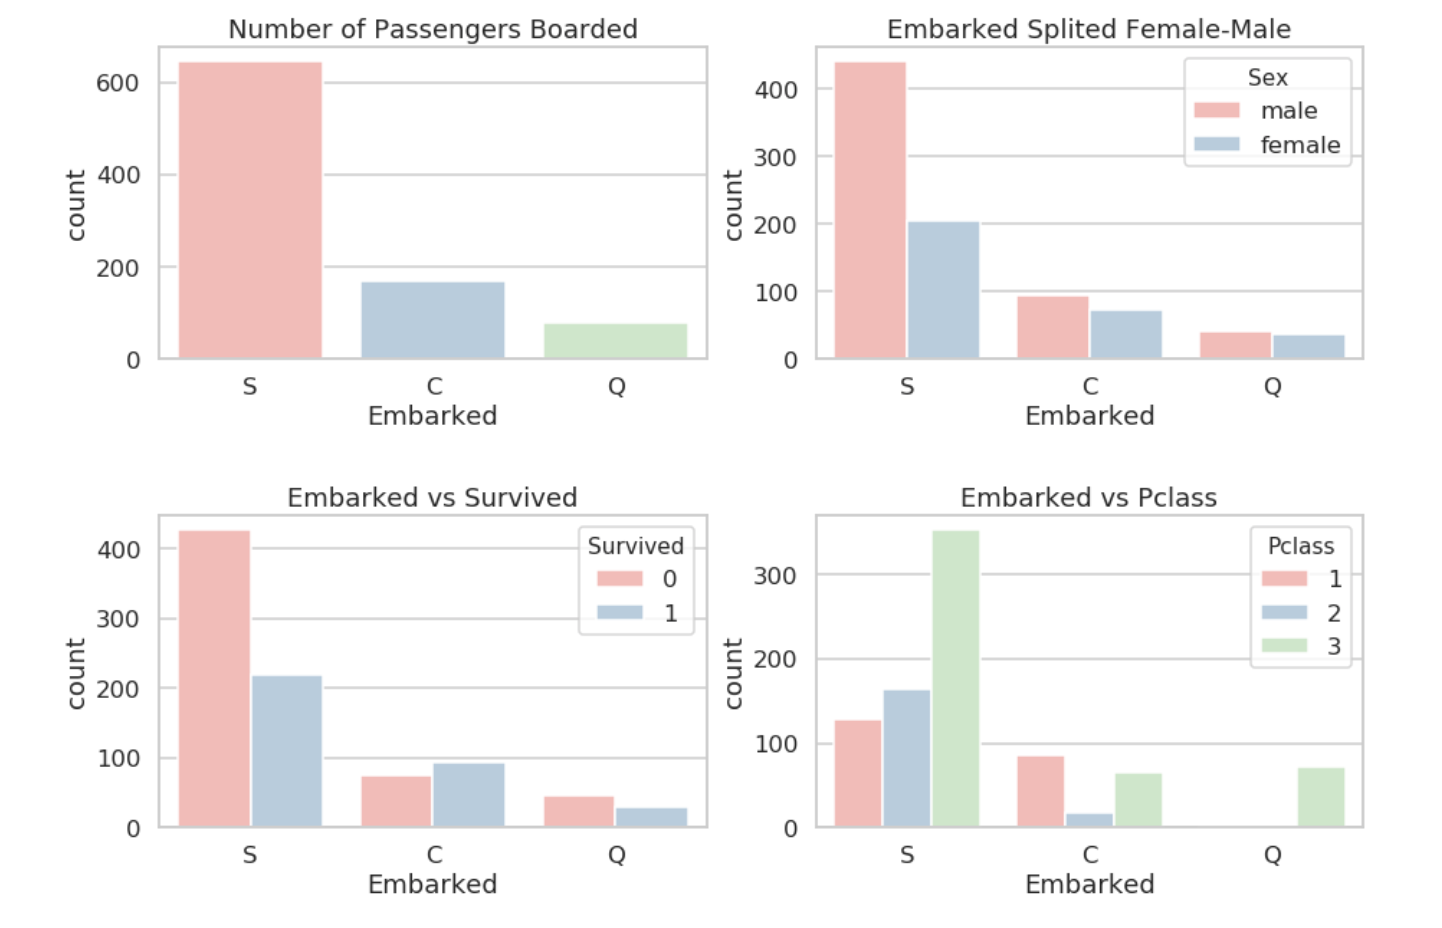

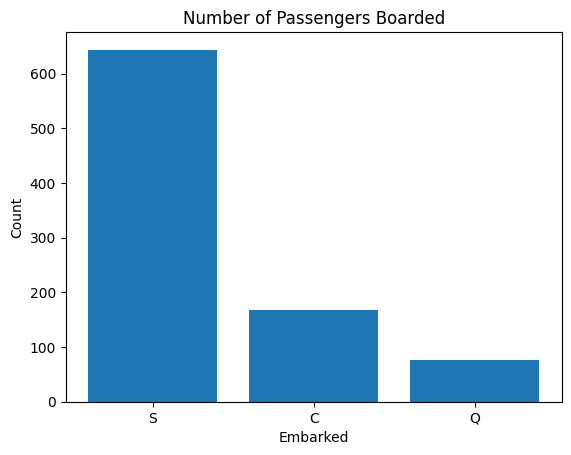

In [76]:
cs = len(dataset[dataset["Embarked"] == 'S'])
cc = len(dataset[dataset["Embarked"] == 'C'])
cd = len(dataset[dataset["Embarked"] == 'Q'])





plt.bar([1, 2, 3], [cs, cc, cd], width=0.8 , label='Survived')



plt.title('Number of Passengers Boarded')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([1, 2, 3], ['S', 'C', 'Q'])


plt.show()


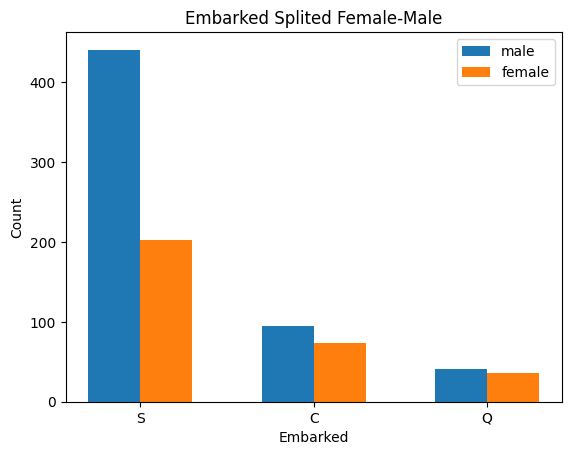

In [77]:



csm = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Sex"] == 'male')])
ccm = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Sex"] == 'male')])
cdm = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Sex"] == 'male')])

csf = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Sex"] == 'female')])
ccf = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Sex"] == 'female')])
cdf = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Sex"] == 'female')])


plt.bar([1, 2, 3], [csm, ccm, cdm], width=0.3, label='male')
plt.bar([1.3, 2.3, 3.3], [csf, ccf, cdf], width=0.3, label='female')


plt.title('Embarked Splited Female-Male')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([1.15, 2.15, 3.15], ['S', 'C', 'Q'])
plt.legend()

plt.show()


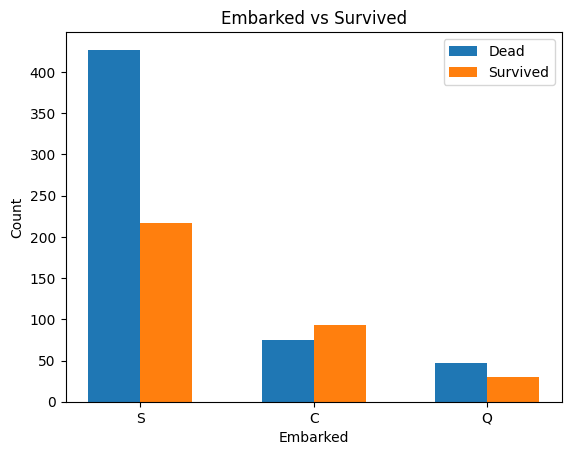

In [78]:



csm = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Survived"] == 0)])
ccm = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Survived"] == 0)])
cdm = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Survived"] == 0)])

csf = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Survived"] == 1)])
ccf = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Survived"] == 1)])
cdf = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Survived"] == 1)])


plt.bar([1, 2, 3], [csm, ccm, cdm], width=0.3, label='Dead')
plt.bar([1.3, 2.3, 3.3], [csf, ccf, cdf], width=0.3, label='Survived')


plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([1.15, 2.15, 3.15], ['S', 'C', 'Q'])
plt.legend()

plt.show()


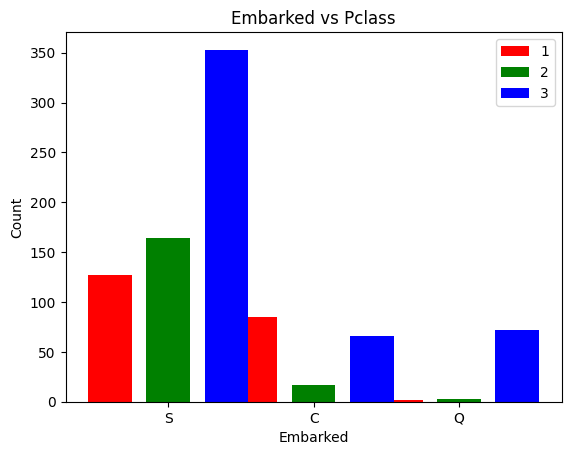

In [79]:
cs1 = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Pclass"] == 1)])
cc1 = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Pclass"] == 1)])
cd1 = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Pclass"] == 1)])

cs2 = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Pclass"] == 2)])
cc2 = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Pclass"] == 2)])
cd2 = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Pclass"] == 2)])

cs3 = len(dataset[(dataset["Embarked"] == 'S') & (dataset["Pclass"] == 3)])
cc3 = len(dataset[(dataset["Embarked"] == 'C') & (dataset["Pclass"] == 3)])
cd3 = len(dataset[(dataset["Embarked"] == 'Q') & (dataset["Pclass"] == 3)])

plt.bar([1, 2, 3], [cs1, cc1, cd1], width=0.3, label='1', color='red')
plt.bar([1.4, 2.4, 3.4], [cs2, cc2, cd2], width=0.3, label='2', color='green')
plt.bar([1.8, 2.8, 3.8], [cs3, cc3, cd3], width=0.3, label='3', color='blue')

plt.title('Embarked vs Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([1.4, 2.4, 3.4], ['S', 'C', 'Q'])
plt.legend()

plt.show()


**Коментар**:


1.   З борту S зайшло найбільше людей.
2.   З боту C врятовалося більше ніж загинуло

**Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

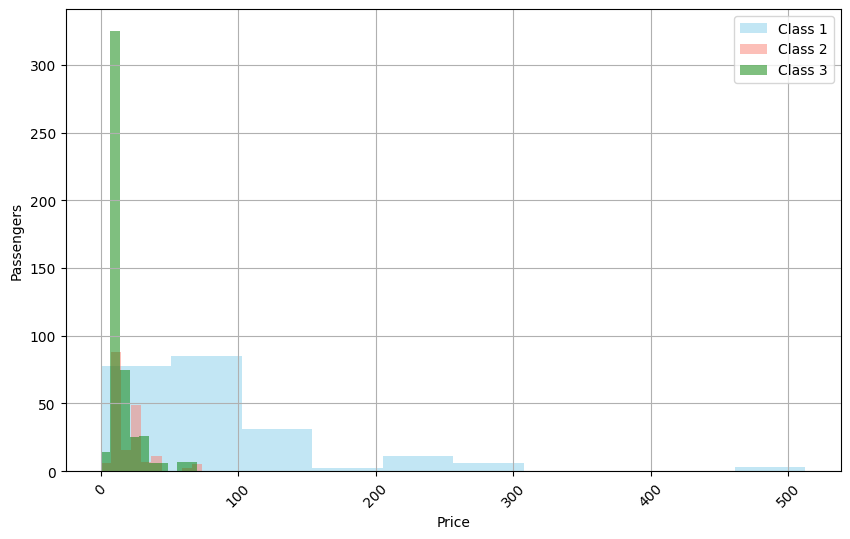

In [80]:
class_1 = dataset[dataset['Pclass'] == 1]['Fare']
class_2 = dataset[dataset['Pclass'] == 2]['Fare']
class_3 = dataset[dataset['Pclass'] == 3]['Fare']

plt.figure(figsize=(10, 6))
plt.hist(class_1, bins=10, color='skyblue', alpha=0.5, label='Class 1')
plt.hist(class_2, bins=10, color='salmon', alpha=0.5, label='Class 2')
plt.hist(class_3, bins=10, color='green', alpha=0.5, label='Class 3')
plt.xlabel('Price')
plt.ylabel('Passengers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()






**Коментар**:


1.   Найпопулярніші квитки 3 класу
